# EDA on Zomato Dataset

### Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

### Understanding the dataset

In [3]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
df.shape

(51717, 17)

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Cleaning the data

In [8]:
#Deleting Unnnecessary Columns
df=df.drop(['url','dish_liked','phone','address','listed_in(city)','menu_item','reviews_list','dish_liked'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [9]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [10]:
#Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
name                           30958 non-null object
online_order                   30958 non-null object
book_table                     30958 non-null object
rate                           30958 non-null object
votes                          30958 non-null int64
location                       30958 non-null object
rest_type                      30958 non-null object
cuisines                       30958 non-null object
approx_cost(for two people)    30958 non-null object
listed_in(type)                30958 non-null object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [11]:
#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
name            30958 non-null object
online_order    30958 non-null object
book_table      30958 non-null object
rate            30958 non-null object
votes           30958 non-null int64
location        30958 non-null object
rest_type       30958 non-null object
cuisines        30958 non-null object
cost            30958 non-null object
type            30958 non-null object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [12]:
# rates
def rates(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [13]:
df['rate'] = df['rate'].apply(rates)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
df['rate'].isnull().sum()

1320

In [15]:
df['rate'] = pd.to_numeric(df['rate'])
df['rate'].fillna(df['rate'].mean(), inplace = True)
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
dtype: int64

In [16]:
def cost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [17]:
df['cost'] = df['cost'].apply(cost)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [18]:
# location
df['location'].value_counts()

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
Marathahalli             1415
JP Nagar                 1221
Jayanagar                1154
Bellandur                1001
Electronic City           937
Bannerghatta Road         907
Sarjapur Road             838
Brigade Road              653
Koramangala 7th Block     604
Koramangala 6th Block     580
Brookefield               548
Koramangala 4th Block     548
MG Road                   538
Kalyan Nagar              530
Malleshwaram              519
Ulsoor                    513
Banashankari              502
Koramangala 1st Block     472
New BEL Road              472
Church Street             440
Basavanagudi              431
Residency Road            407
Frazer Town               401
Rajajinagar               390
Lavelle Road              386
                         ... 
CV Raman Nagar             63
Sadashiv Nagar             57
City Marke

In [19]:
location = df['location'].value_counts(ascending= False)
location_lessthan500 = location[location < 500]

In [20]:
def location_type(value):
    if value in location_lessthan500:
        return 'other'
    else:
        return value

In [21]:
df['location'] = df['location'].apply(location_type)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [22]:
# cuisines
df['cuisines'].value_counts()

North Indian                                            1602
North Indian, Chinese                                   1401
South Indian                                             902
Bakery, Desserts                                         471
Biryani                                                  429
South Indian, North Indian, Chinese                      414
Cafe                                                     405
Desserts                                                 377
Fast Food                                                374
Ice Cream, Desserts                                      289
Chinese                                                  285
Bakery                                                   276
Mithai, Street Food                                      237
Chinese, North Indian                                    217
North Indian, Chinese, Biryani                           201
Desserts, Ice Cream                                      195
Finger Food             

In [23]:
cuisines = df['cuisines'].value_counts(ascending=False)

In [24]:
cuisines_lessthan100 = cuisines[cuisines < 100]
def cuis_type(value):
    if value in cuisines_lessthan100:
        return 'other'
    else:
        return value

In [25]:
df['cuisines']= df['cuisines'].apply(cuis_type)
df['cuisines'].value_counts()

other                                               18965
North Indian                                         1602
North Indian, Chinese                                1401
South Indian                                          902
Bakery, Desserts                                      471
Biryani                                               429
South Indian, North Indian, Chinese                   414
Cafe                                                  405
Desserts                                              377
Fast Food                                             374
Ice Cream, Desserts                                   289
Chinese                                               285
Bakery                                                276
Mithai, Street Food                                   237
Chinese, North Indian                                 217
North Indian, Chinese, Biryani                        201
Desserts, Ice Cream                                   195
Finger Food   

In [34]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,other,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,other,600.0,Buffet


### Visualizations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

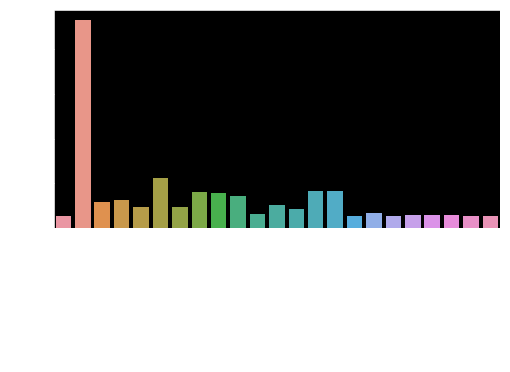

In [60]:
"""Q.1 Which locations are having maximum restaurants? So which will be a suitable location to open 
a restaurant?"""
plt.figure(figsize = (8,4))
ax = sns.countplot(df['location'])
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

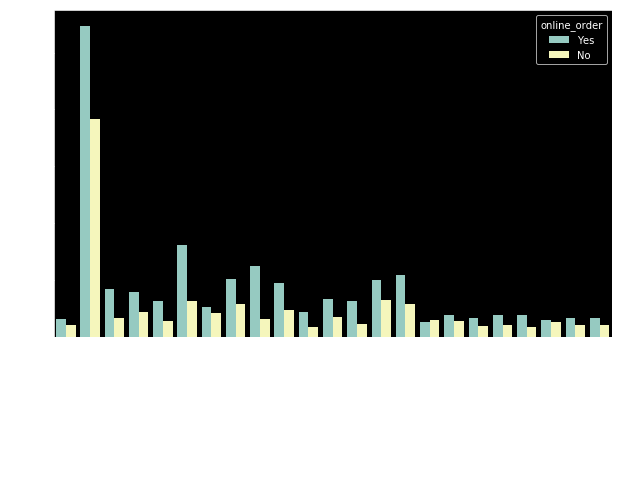

In [58]:
"""Q.2 Visualize online order facility location wise."""
plt.figure(figsize = (10,6))
sns.countplot(x='location', hue='online_order', data = df)
plt.xticks(rotation=90)

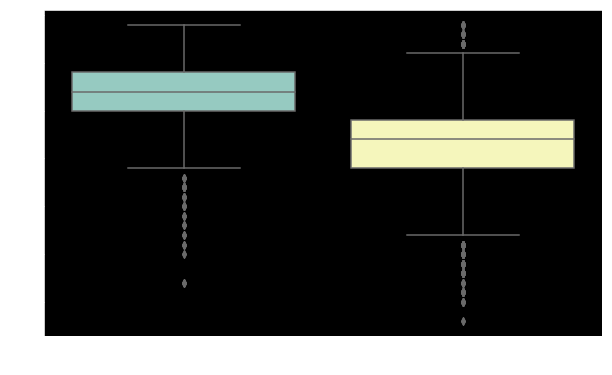

In [53]:
"""Q.3 Visualize book_table vs Rate"""
plt.figure(figsize = (10,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

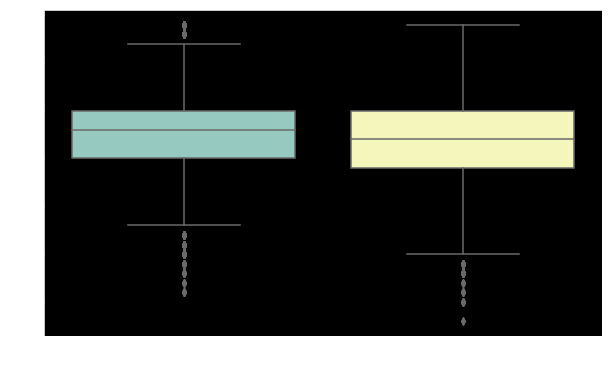

In [52]:
"""Q.4 Visualize online_order vs Rate"""
plt.figure(figsize = (10,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

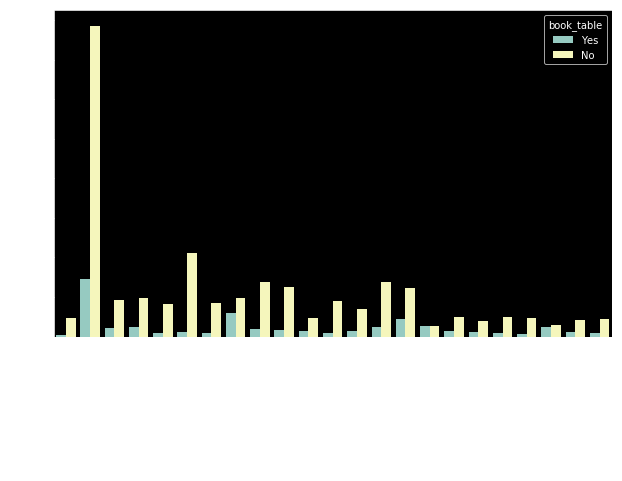

In [57]:
"""Q.5 Visualizing Book Table facility Location Wise"""
plt.figure(figsize = (10,6))
sns.countplot(x='location', hue='book_table', data = df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

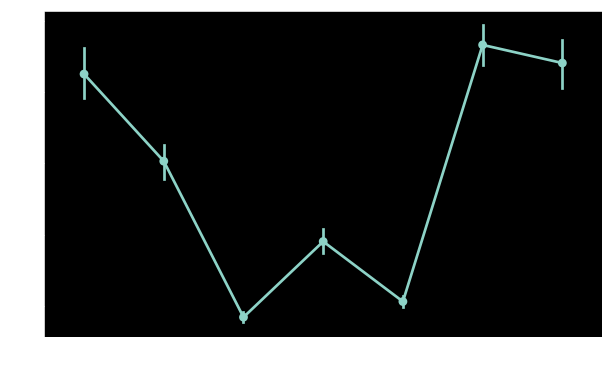

In [50]:
"""Q.6 Visualizing Types of Restaurants vs Rate"""
plt.figure(figsize = (10,6))
sns.pointplot(x = 'type', y = 'rate', data = df)
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

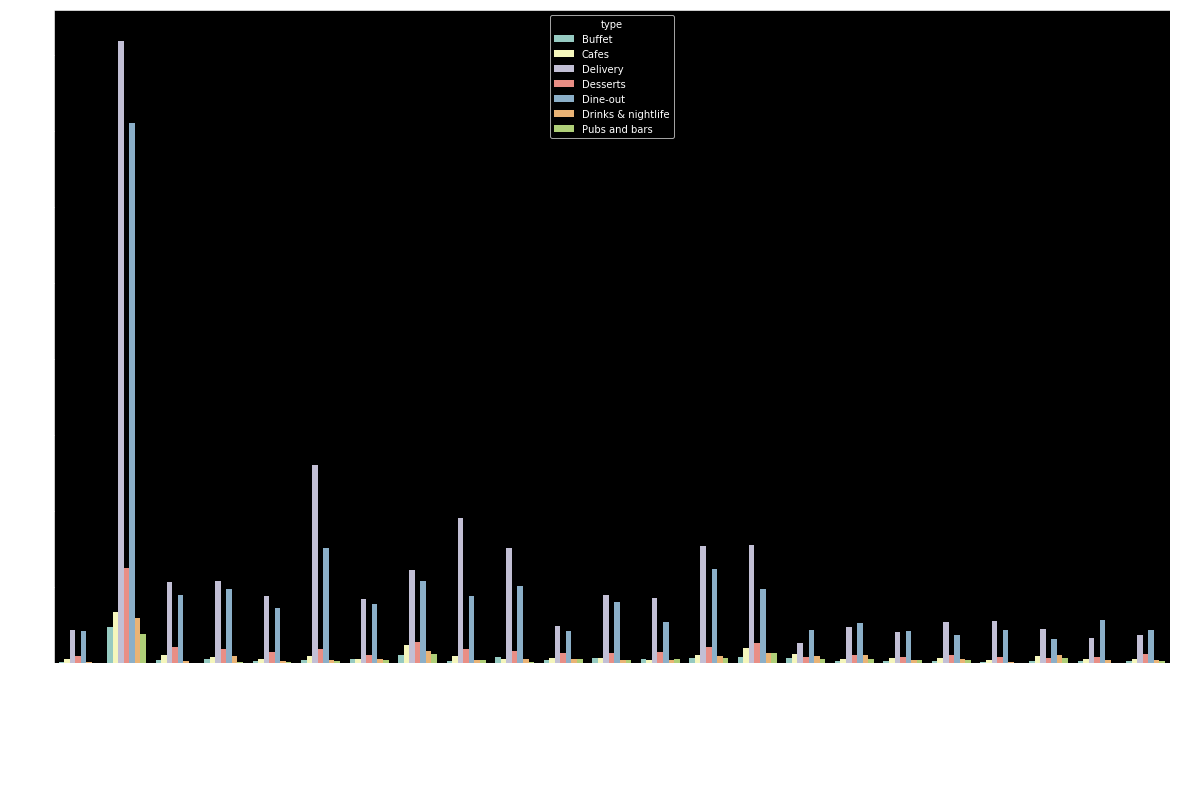

In [65]:
"""Q.7 Types of Restaurants location wise"""
plt.figure(figsize = (20,12))
sns.countplot(x='location', hue='type', data = df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

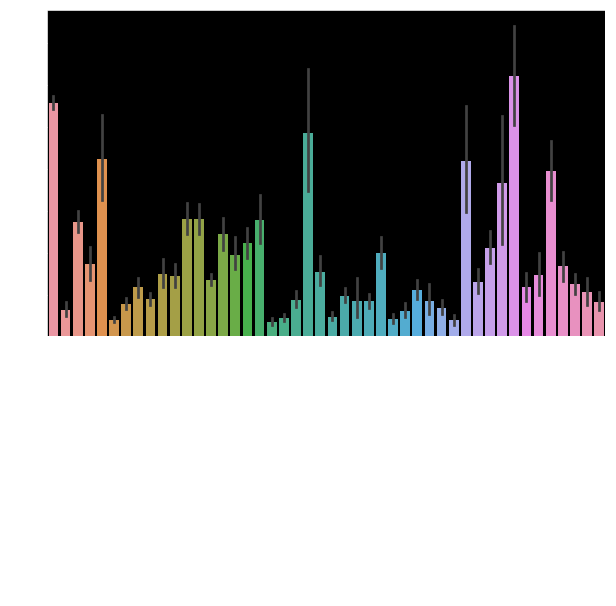

In [66]:
"""Q.8 Visualizing Top Cuisines wrt votes"""
plt.figure(figsize = (10,6))
sns.barplot(x = 'cuisines',y = 'votes', data = df)
plt.xticks(rotation = 90)